<a href="https://colab.research.google.com/github/dudesparsh/PracticeBeg/blob/master/Digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
#loading the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


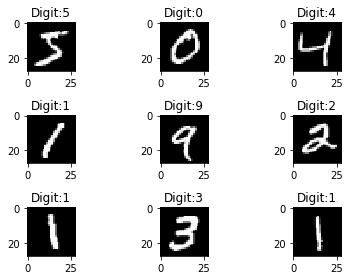

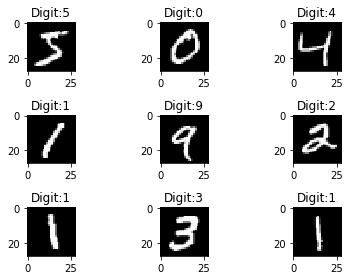

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit:{}".format(y_train[i]))
  plt.xticks()
  plt.yticks()
fig

In [5]:
# Now reshaping our array from 3d to 4D
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# To make sure that all our values are float, so that we can get decimal points after 0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Now normalizing colour codes by dividing it by max RGB
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
import tensorflow as tf
# Now importing req. Keras modules containg model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#Creating a Sequential model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0,2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 48s 802us/step - loss: 0.1800 - acc: 0.9464
Epoch 2/10
60000/60000 [==============================] - 45s 754us/step - loss: 0.0630 - acc: 0.9806
Epoch 3/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.0396 - acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.0244 - acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.0186 - acc: 0.9940
Epoch 6/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.0144 - acc: 0.9953
Epoch 7/10
60000/60000 [==============================] - 45s 743us/step - loss: 0.0112 - acc: 0.9965
Epoch 8/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.0096 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.0090 - acc: 0.9971
Epoch 10/10
60000/60000 [=========

10000/10000 [==============================] - 2s 229us/step
9


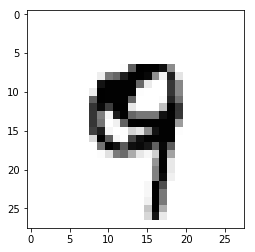

In [12]:
model.evaluate(x_test, y_test)

image_index = 4444
plt.imshow(x_test[image_index].reshape(28,28), cmap = 'Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())